In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
campaign_desc = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\campaign_desc.csv")
campaign_table = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\campaign_table.csv")
casual = pd.read_csv("D:\\Documents\\Qua môn\Datawarehouse&BI\extracted_files\\causal_data.csv")
coupon = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\coupon.csv")
coupon_redempt = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\coupon_redempt.csv")
demographic = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\hh_demographic.csv")
product = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\product.csv")
transaction = pd.read_csv("D:\\Documents\\Qua môn\\Datawarehouse&BI\\extracted_files\\transaction_data.csv")

In [3]:
data_key = demographic.set_index('household_key').sort_values(by='household_key')

data_key.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
household_key,,,,,,,
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown


In [4]:
for col in data_key.columns:
    value_counts = data_key[col].value_counts()
    print(f'{col} Freq:')
    print(value_counts)

AGE_DESC Freq:
AGE_DESC
45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: count, dtype: int64
MARITAL_STATUS_CODE Freq:
MARITAL_STATUS_CODE
U    344
A    340
B    117
Name: count, dtype: int64
INCOME_DESC Freq:
INCOME_DESC
50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: count, dtype: int64
HOMEOWNER_DESC Freq:
HOMEOWNER_DESC
Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: count, dtype: int64
HH_COMP_DESC Freq:
HH_COMP_DESC
2 Adults No Kids    255
2 Adults Kids       187
Single Female       144
Single Male          95
Unknown              73
1 Adult Kids         47
Name: count, dtype: int64
HOUSEHOLD_SIZE_DESC Freq:
HOUSEHOLD_SIZE_DESC
2     318
1     255
3     109
5+     66
4      53
Name: count, dtype: int64
KID_CATEGORY

In [5]:
#Gắn nhãn data:
def map_age_desc(age_desc):
    if age_desc == '19-24': return 1
    elif age_desc == '25-34':return 2
    elif age_desc == '35-44': return 3
    elif age_desc == '45-54': return 4
    elif age_desc == '55-64': return 5
    elif age_desc == '65+': return 6
    else: return None

data_key['age_desc_n'] = data_key['AGE_DESC'].apply(map_age_desc)

def map_marital_status_code(code):
    if code == 'A':  return 3
    elif code == 'U': return 1
    elif code == 'B': return 2
    else: return None
    
data_key['MARITAL_STATUS_CODE_n'] = data_key['MARITAL_STATUS_CODE'].apply(map_marital_status_code)

def map_income_desc(income_desc):
    if income_desc == 'Under 15K':return 1
    elif income_desc == '15-24K':return 2
    elif income_desc == '25-34K': return 3
    elif income_desc == '35-49K': return 4
    elif income_desc == '50-74K': return 5
    elif income_desc == '75-99K':  return 6
    elif income_desc == '100-124K':  return 7
    elif income_desc == '125-149K': return 8
    elif income_desc == '150-174K':  return 9
    elif income_desc == '175-199K': return 10
    elif income_desc == '200-249K': return 11
    elif income_desc == '250K+': return 12
    else: return None

data_key['INCOME_DESC_n'] = data_key['INCOME_DESC'].apply(map_income_desc)

def map_homeowner_desc(homeowner_desc):
    if homeowner_desc == 'Unknown': return 1
    elif homeowner_desc == 'Probable Renter': return 2
    elif homeowner_desc == 'Renter':  return 3
    elif homeowner_desc == 'Probable Owner':  return 4
    elif homeowner_desc == 'Homeowner': return 5
    else: return None

data_key['HOMEOWNER_DESC_n'] = data_key['HOMEOWNER_DESC'].apply(map_homeowner_desc)

def map_hh_comp_desc(hh_comp_desc):
    if hh_comp_desc == 'Unknown': return 1
    elif hh_comp_desc == 'Single Female':  return 2
    elif hh_comp_desc == 'Single Male':  return 3
    elif hh_comp_desc == '1 Adult Kids':  return 4
    elif hh_comp_desc == '2 Adults No Kids': return 5
    elif hh_comp_desc == '2 Adults Kids': return 6
    else:  return 0  

data_key['HH_COMP_DESC_n'] = data_key['HH_COMP_DESC'].apply(map_hh_comp_desc)

def map_household_size_desc(desc):
    if desc == '1': return 1
    elif desc == '2':  return 2
    elif desc == '3': return 3
    elif desc == '4': return 4
    elif desc == '5+':  return 5
    else:  return None

data_key['HOUSEHOLD_SIZE_DESC_n'] = data_key['HOUSEHOLD_SIZE_DESC'].apply(map_household_size_desc)


def map_kid_category_desc(desc):
    if desc == 'None/Unknown': return 1
    elif desc == '1':  return 2
    elif desc == '2': return 3
    elif desc == '3+':  return 4
    else: return None

data_key['KID_CATEGORY_DESC_n'] = data_key['KID_CATEGORY_DESC'].apply(map_kid_category_desc)

data_key

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
household_key,,,,,,,,,,,,,,
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,6,3,4,5,5,2,1
7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,4,3,5,5,5,2,1
8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,2,1,3,1,6,3,2
13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,2,1,6,5,6,4,3
16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,4,2,5,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,3,1,5,5,5,2,1
2496,45-54,A,75-99K,Homeowner,Unknown,3,1,4,3,6,5,1,3,2
2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,4,1,4,1,3,1,1


In [6]:
selected_columns = ['age_desc_n', 'MARITAL_STATUS_CODE_n', 'INCOME_DESC_n', 'HOMEOWNER_DESC_n', 'HH_COMP_DESC_n', 'HOUSEHOLD_SIZE_DESC_n', 'KID_CATEGORY_DESC_n']
data_key = data_key[selected_columns]
data_key
data_key.describe()

,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,3.484395,1.995006,4.710362,3.676654,4.033708,2.197253,1.550562
std,1.279675,0.924649,2.264620,1.803903,1.706638,1.193123,0.956688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,2.000000,5.000000,5.000000,5.000000,2.000000,1.000000
75%,4.000000,3.000000,6.000000,5.000000,5.000000,3.000000,2.000000
max,6.000000,3.000000,12.000000,5.000000,6.000000,5.000000,4.000000


array([[<Axes: title={'center': 'age_desc_n'}>,
        <Axes: title={'center': 'MARITAL_STATUS_CODE_n'}>,
        <Axes: title={'center': 'INCOME_DESC_n'}>],
       [<Axes: title={'center': 'HOMEOWNER_DESC_n'}>,
        <Axes: title={'center': 'HH_COMP_DESC_n'}>,
        <Axes: title={'center': 'HOUSEHOLD_SIZE_DESC_n'}>],
       [<Axes: title={'center': 'KID_CATEGORY_DESC_n'}>, <Axes: >,
        <Axes: >]], dtype=object)

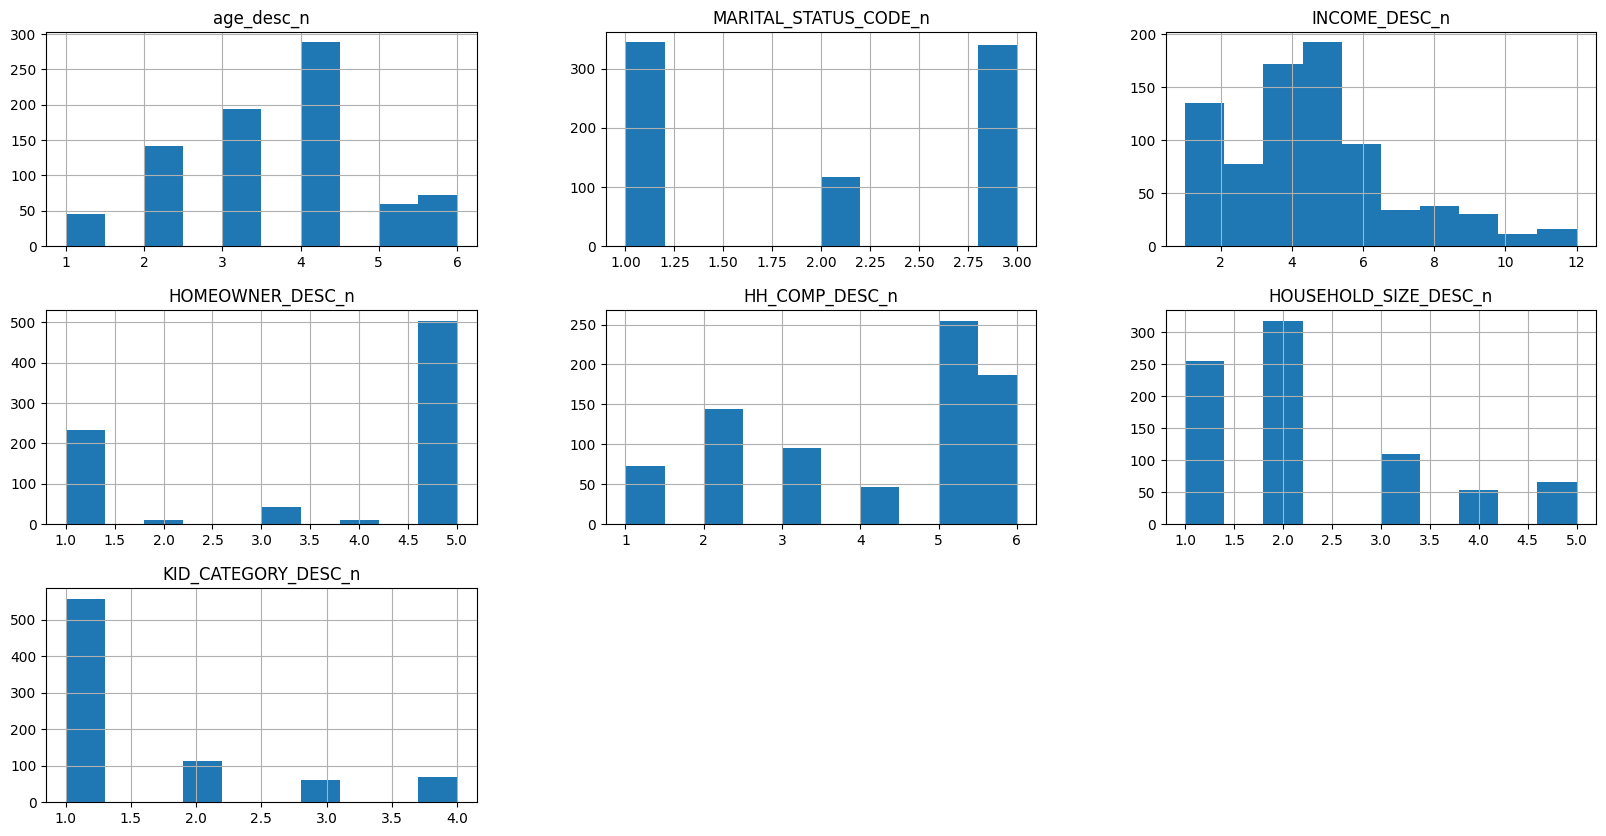

In [7]:
data_key.hist(figsize=(20,10))

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
transaction.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00
mean,1271.95,34026199138.89,388.76,2891435.16,100.43,3.10,3142.67,-0.54,1561.59,56.22,-0.02,-0.00
std,726.07,4711649037.86,189.72,3837403.69,1153.44,4.18,8937.11,1.25,399.84,27.10,0.22,0.04
min,1.00,26984851472.00,1.00,25671.00,0.00,0.00,1.00,-180.00,0.00,1.00,-55.93,-7.70
25%,656.00,30408046256.00,229.00,917459.00,1.00,1.29,330.00,-0.69,1308.00,33.00,0.00,0.00
50%,1272.00,32760806548.00,390.00,1028816.00,1.00,2.00,372.00,-0.01,1613.00,56.00,0.00,0.00
75%,1913.00,40126853628.00,553.00,1133018.00,1.00,3.49,422.00,0.00,1843.00,80.00,0.00,0.00
max,2500.00,42305362535.00,711.00,18316298.00,89638.00,840.00,34280.00,3.99,2359.00,102.00,0.00,0.00


In [9]:
trans_valid= transaction.loc[transaction['SALES_VALUE']>0]
datamart = trans_valid.groupby(['household_key']).agg({
'DAY': lambda x: (712 - x.max()),
'BASKET_ID': 'nunique',
'SALES_VALUE': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'DAY': 'Recency(Days)',
'BASKET_ID': 'Frequency',
'SALES_VALUE': 'Monetary'}, inplace=True)
datamart.describe()

,Recency(Days),Frequency,Monetary
count,2500.00,2500.00,2500.00
mean,26.58,110.22,3222.99
std,62.79,115.27,3349.03
min,1.00,1.00,8.17
25%,2.00,38.00,970.74
50%,7.00,78.00,2157.75
75%,21.00,142.00,4413.32
max,658.00,1298.00,38319.79


In [10]:
datamart = trans_valid.groupby(['household_key']).agg({
'DAY': lambda x: (712 - x.max()),
'BASKET_ID': 'nunique',
'SALES_VALUE': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'DAY': 'Recency(Days)',
'BASKET_ID': 'Frequency',
'SALES_VALUE': 'Monetary'}, inplace=True)
datamart

,Recency(Days),Frequency,Monetary
household_key,,,
1,6,85,4330.16
2,44,45,1954.34
3,9,47,2653.21
4,85,30,1200.11
5,9,40,779.06
...,...,...,...
2496,29,63,4339.66
2497,12,221,7111.98
2498,2,172,2601.60


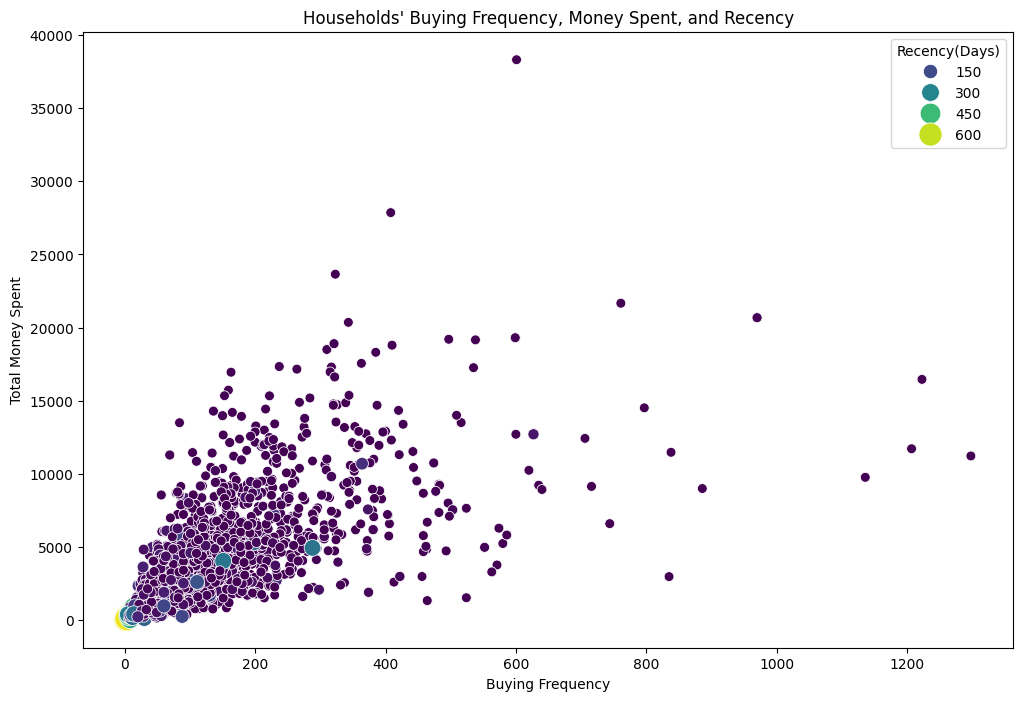

In [11]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency(Days)', data=datamart, palette='viridis', size='Recency(Days)', sizes=(50, 300))

# Adding labels and title
plt.xlabel('Buying Frequency')
plt.ylabel('Total Money Spent')
plt.title('Households\' Buying Frequency, Money Spent, and Recency')

# Show the plot
plt.show()


In [12]:
household_stats = transaction.groupby('household_key').agg({
    'BASKET_ID': 'nunique',   # Buying frequency
    'SALES_VALUE': 'sum'       # Total money spent
}).reset_index()

# Rename the columns for clarity
household_stats.columns = ['HOUSEHOLD_KEY', 'Buying_Frequency', 'Total_Money_Spent']

# Find top 5 households with the best buying frequency
top_5_frequency = household_stats.nlargest(5, 'Buying_Frequency')

# Find top 5 households with the highest total money spent
top_5_money_spent = household_stats.nlargest(5, 'Total_Money_Spent')

# Display the results
print("Top 5 households with the best buying frequency:")
print(top_5_frequency)

print("\nTop 5 households with the highest total money spent:")
print(top_5_money_spent)

Top 5 households with the best buying frequency:
      HOUSEHOLD_KEY  Buying_Frequency  Total_Money_Spent
1509           1510              1300           11211.37
899             900              1223           16450.53
2336           2337              1210           11703.97
1794           1795              1138            9751.73
2458           2459               971           20671.50

Top 5 households with the highest total money spent:
      HOUSEHOLD_KEY  Buying_Frequency  Total_Money_Spent
1022           1023               603           38319.79
1608           1609               412           27859.68
2321           2322               323           23646.92
1452           1453               761           21661.29
2458           2459               971           20671.50


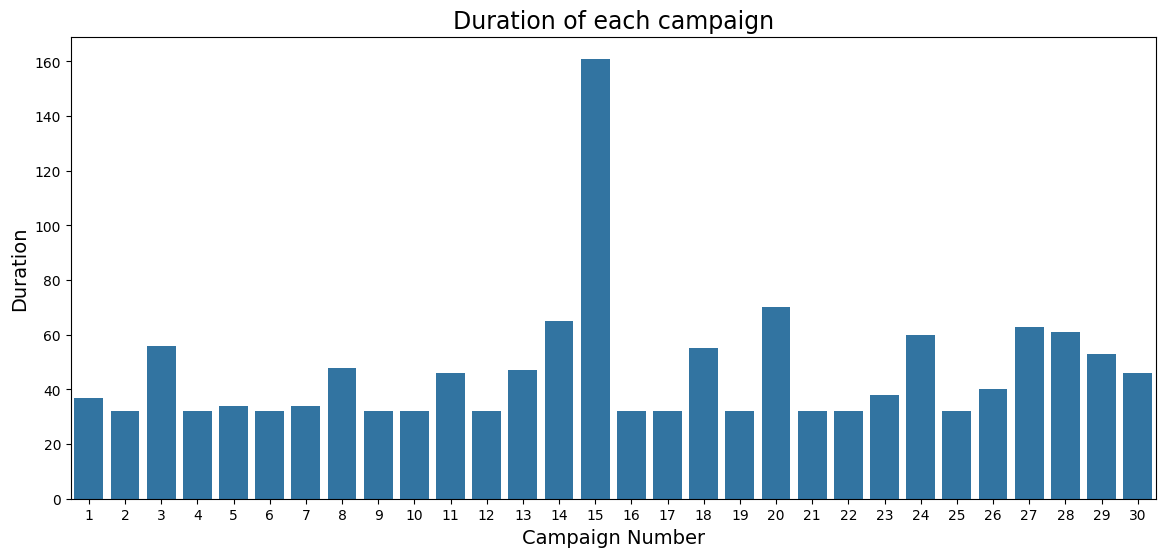

In [13]:
campaign_desc["DUR"] = campaign_desc.END_DAY-campaign_desc.START_DAY
fig = plt.figure(figsize=(14,6))
sns.barplot(x="CAMPAIGN",y="DUR",data=campaign_desc,orient="v",
            order=campaign_desc.sort_values(by="CAMPAIGN").CAMPAIGN.values)
plt.title('Duration of each campaign', fontsize=17)
plt.xlabel('Campaign Number', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.show()

In [14]:
campaign_frequency = campaign_desc['DESCRIPTION'].value_counts().reset_index()
campaign_frequency.columns = ['Campaign Type', 'Frequency']
campaign_frequency
# Display the result
print(campaign_frequency.describe())

       Frequency
count       3.00
mean       10.00
std         7.81
min         5.00
25%         5.50
50%         6.00
75%        12.50
max        19.00


In [15]:
coupon_data=coupon.groupby('CAMPAIGN').agg(nb_coupon = ('COUPON_UPC','nunique'),nb_product = ('PRODUCT_ID','nunique')).sort_values('nb_product', ascending = False)

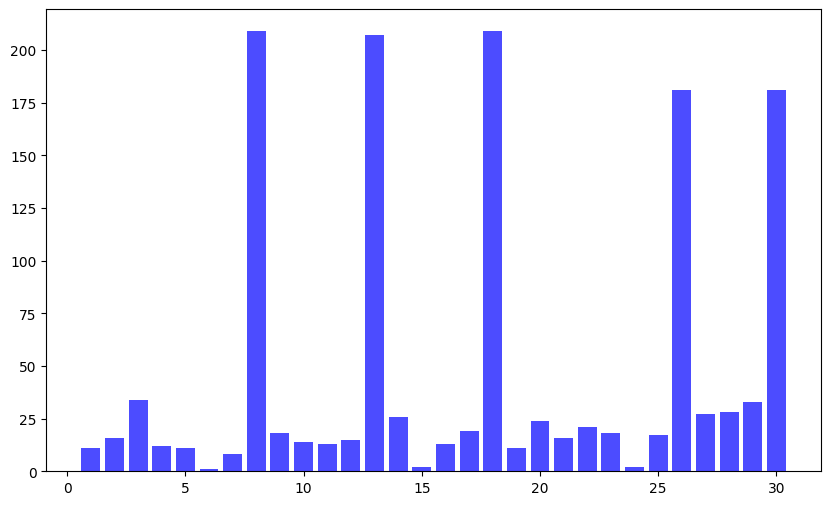

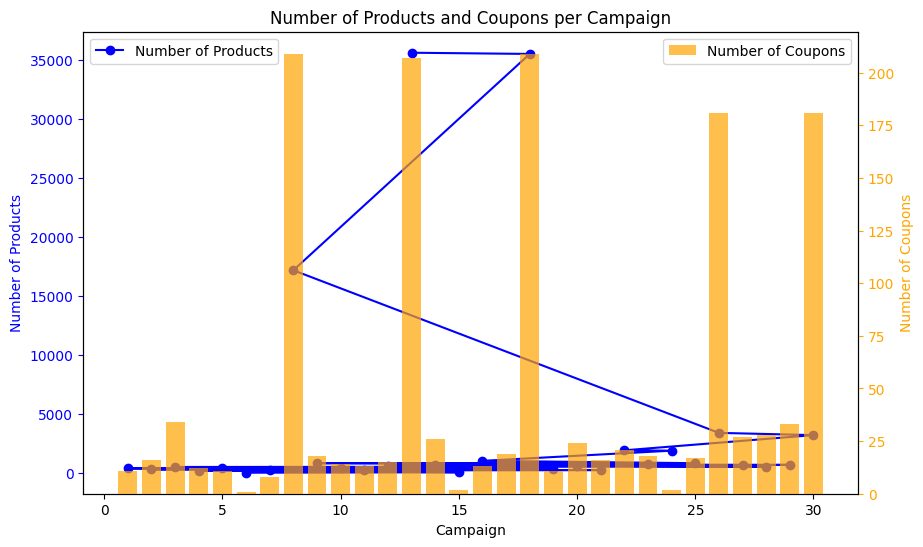

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for 'nb_coupon'
ax.bar(coupon_data.index, coupon_data['nb_coupon'], label='Number of Coupons', color='blue', alpha=0.7)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for 'nb_product'
ax1.plot(coupon_data.index, coupon_data['nb_product'], label='Number of Products', marker='o', linestyle='-', color='blue')

# Adding labels and title for the line plot
ax1.set_xlabel('Campaign')
ax1.set_ylabel('Number of Products', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Number of Products and Coupons per Campaign')

# Creating a second y-axis for 'nb_coupon' as bar chart
ax2 = ax1.twinx()
ax2.bar(coupon_data.index, coupon_data['nb_coupon'], label='Number of Coupons', color='orange', alpha=0.7)

# Adding labels and title for the bar chart
ax2.set_ylabel('Number of Coupons', color='orange')
ax2.tick_params('y', colors='orange')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In [17]:
basket = transaction.groupby(['BASKET_ID'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),COUPON_MATCH_DISC = ('COUPON_MATCH_DISC', 'sum') )
basket['Use_coupon'] = basket['COUPON_DISC'] != 0

basket.head()

,BASKET_ID,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_coupon
0,26984851472,5.91,0.00,0.00,False
1,26984851516,12.43,0.00,0.00,False
2,26984896261,11.37,0.00,0.00,False
3,26984905972,2.55,0.00,0.00,False
4,26984945254,3.53,0.00,0.00,False


In [18]:
round(basket['SALES_VALUE'].mean(),2)
print('The average basket value is $'+str(round(basket['SALES_VALUE'].mean(),2))+'.')
basket.describe()

The average basket value is $29.14.


,BASKET_ID,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
count,276484.00,276484.00,276484.00,276484.00
mean,33904014110.50,29.14,-0.15,-0.03
std,4673907320.55,36.10,0.99,0.24
min,26984851472.00,0.00,-74.89,-15.95
25%,30175850193.75,6.96,0.00,0.00
50%,32744512372.00,17.07,0.00,0.00
75%,40037826769.25,36.28,0.00,0.00
max,42305362535.00,961.49,0.00,0.00


Text(0.5, 1.0, 'Basket value boxplot')

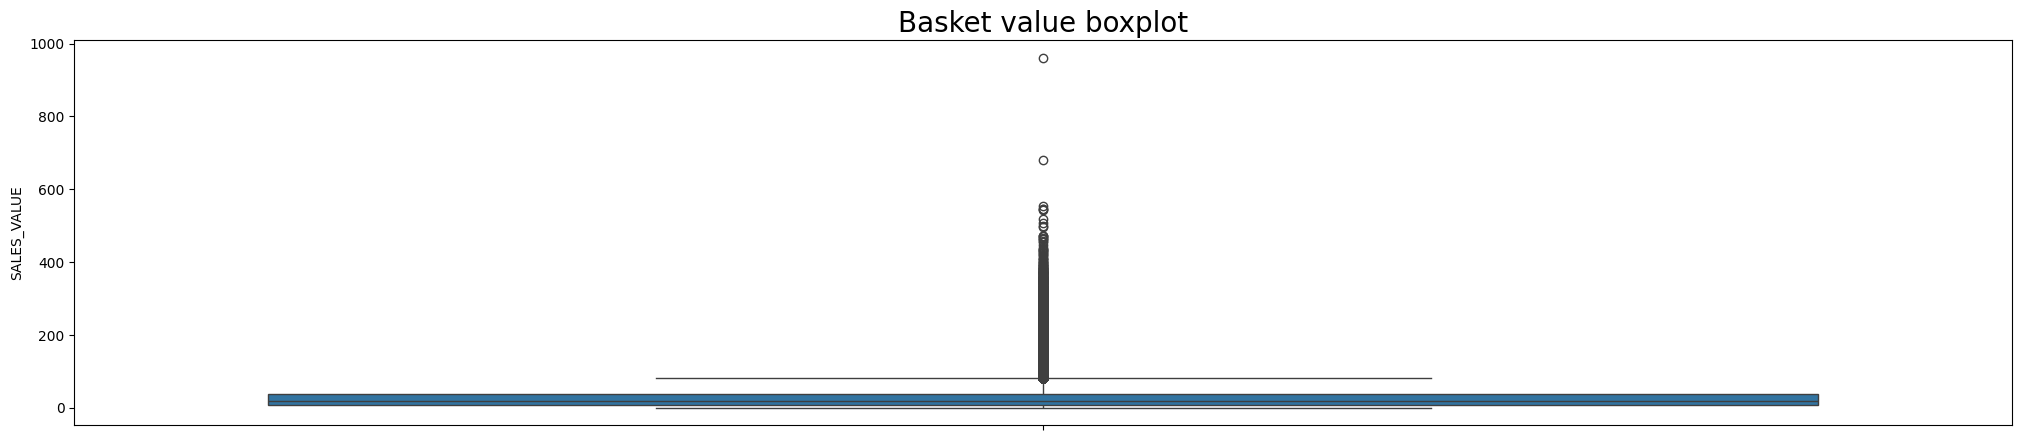

In [19]:
plt.figure(figsize = (25,5))
ax = sns.boxplot( basket['SALES_VALUE'])
plt.title('Basket value boxplot', fontsize = 20)

In [20]:
transaction_bis = transaction.merge(right = basket[['BASKET_ID','Use_coupon']], on = 'BASKET_ID', how = 'left') 
transaction_bis['product_value'] = transaction_bis['SALES_VALUE']/transaction_bis['QUANTITY']
transaction_bis =  transaction_bis.merge(right = product, on = 'PRODUCT_ID', how = 'left') 

In [21]:
COMMODITY_coupon = transaction_bis.groupby(['COMMODITY_DESC'], as_index = False).agg(Qt_total= ('QUANTITY', 'count'),Use_coupon = ('Use_coupon', 'sum'), COUPON = ('COUPON_DISC', 'sum'))
COMMODITY_coupon['%_Coupon'] = round(((COMMODITY_coupon['Use_coupon']/COMMODITY_coupon['Qt_total'])*100),2)
COMMODITY_coupon = COMMODITY_coupon.sort_values('COUPON', ascending = True)
COMMODITY_coupon.head(11)

,COMMODITY_DESC,Qt_total,Use_coupon,COUPON,%_Coupon
0,,7839,6198,-10306.04,79.07
273,SOFT DRINKS,117532,13685,-3653.98,11.64
58,CIGARETTES,12319,1060,-1454.67,8.60
85,DIAPERS & DISPOSABLES,5008,1226,-1021.82,24.48
3,AIR CARE,5556,1364,-910.04,24.55
67,COLD CEREAL,37870,6466,-848.28,17.07
243,REFRGRATD DOUGH PRODUCTS,18960,4202,-821.73,22.16
140,FRZN MEAT/MEAT DINNERS,56064,10222,-790.54,18.23
134,FROZEN PIZZA,43362,7394,-783.84,17.05
91,DOG FOODS,12093,2437,-732.33,20.15


In [22]:
# Create Daily aggregate data for product trends
transaction_data = transaction[['household_key','DAY','PRODUCT_ID', 'QUANTITY','SALES_VALUE']] \
            .merge(product[['PRODUCT_ID','COMMODITY_DESC']], on='PRODUCT_ID')

# Remove blanks and 'COUPON/MISC ITEMS', and '(CORP USE ONLY)' in the COMMODITY_DESC field as they won't be helpful in the analysis anyway
transaction_data = transaction_data[~transaction_data['COMMODITY_DESC'].isin(['',' ','COUPON/MISC ITEMS','(CORP USE ONLY)'])] 

# Do a daily summary with the following metrics: sales, quantity, number of households
daily_sales = transaction_data.groupby(['COMMODITY_DESC', 'DAY']) \
            .agg({'SALES_VALUE':'sum', 'QUANTITY':'sum', 'household_key':pd.Series.nunique}) \
            .rename(columns = {'household_key':'HOUSEHOLDS'}) \
            .reset_index()

daily_sales.head()

,COMMODITY_DESC,DAY,SALES_VALUE,QUANTITY,HOUSEHOLDS
0,ADULT INCONTINENCE,3,2.99,1,1
1,ADULT INCONTINENCE,8,8.99,1,1
2,ADULT INCONTINENCE,25,4.49,1,1
3,ADULT INCONTINENCE,29,8.99,1,1
4,ADULT INCONTINENCE,30,5.49,1,1


In [23]:
# Prepare dataframes
df_top10 = daily_sales[['COMMODITY_DESC','QUANTITY']]\
            .groupby(['COMMODITY_DESC']).sum().reset_index()
df_top10 = df_top10[df_top10['COMMODITY_DESC'] != ''].sort_values(by = 'QUANTITY', ascending=False)[:10] \
            .sort_values(by = 'QUANTITY')
            

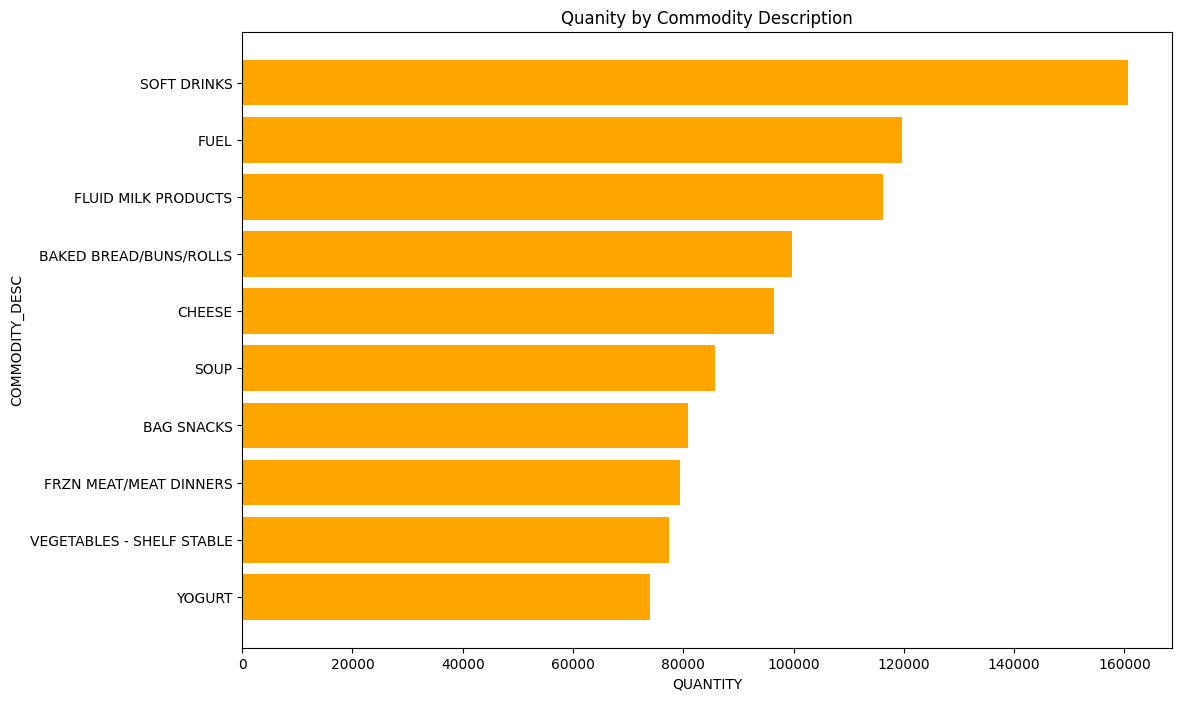

In [24]:
df_sorted = df_top10.sort_values(by='QUANTITY', ascending=True)

# Bar chart for COMMODITY_DESC and SALES_VALUE
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['COMMODITY_DESC'], df_sorted['QUANTITY'], color='orange')

# Adding labels and title
plt.xlabel('QUANTITY')
plt.ylabel('COMMODITY_DESC')
plt.title('Quanity by Commodity Description')

# Show the plot
plt.show()

In [25]:
campaign = pd.merge(campaign_desc[['CAMPAIGN','START_DAY']],campaign_table[['household_key','CAMPAIGN']],on="CAMPAIGN",how="left")
campaign['#campaign']=campaign.groupby(by='household_key')['CAMPAIGN'].transform('count')
#Delete useless column
campaign=campaign.drop(columns=['CAMPAIGN','START_DAY'])
#Delete duplicates
campaign.drop_duplicates(subset=['household_key', '#campaign'], keep="first", inplace=True)
#Drop useless columns
#coupon_redempt=coupon_redempt.drop(columns=['DAY','COUPON_UPC'])
#Keep only one occurence of coupon redeemed by campaign
coupon_redempt.drop_duplicates(subset=['household_key', 'CAMPAIGN'], keep="first", inplace=True)
#Count number of campaign the customer redeemed at least one coupon
redemption_per_household=coupon_redempt.groupby(['household_key'], as_index=False)['CAMPAIGN'].agg({'redeemed': pd.Series.nunique})

temp = pd.merge(campaign, redemption_per_household, on=['household_key'],how="left")
dataset= pd.merge(demographic, temp[['household_key']], on=['household_key'],how="inner")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14012\609503897.py:12: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  redemption_per_household=coupon_redempt.groupby(['household_key'], as_index=False)['CAMPAIGN'].agg({'redeemed': pd.Series.nunique})


In [26]:
# Finding the relations between the variables
plt.figure(figsize=(20,10))
c= dataset.corr(method='spearman')
sns.heatmap(c,annot=True)
c

ValueError: could not convert string to float: '65+'

<Figure size 2000x1000 with 0 Axes>

In [ ]:
#Calculate total sales per customer
total_sales=transaction.groupby(by='household_key', as_index=False)['SALES_VALUE'].sum().rename(columns={'SALES_VALUE': 'Total_sales'})
#Calculate total number of visits per customer
total_visits=transaction.groupby(['household_key'], as_index=False)['BASKET_ID'].agg({'total_visits': pd.Series.nunique})
#Calculate median basket amount per customer
temp_basket=transaction.groupby(['household_key','BASKET_ID'], as_index=False)['SALES_VALUE'].sum()
temp_median_basket=temp_basket.groupby(['household_key'], as_index=False)['SALES_VALUE'].median().rename(columns={'SALES_VALUE': 'median_basket'})
#Calculate average product price bought per customer
temp_product=transaction.groupby(['household_key'], as_index=False)['SALES_VALUE'].mean().rename(columns={'SALES_VALUE': 'avg_price'})
dataset=dataset.merge(total_sales,on='household_key').merge(total_visits,on='household_key').merge(temp_median_basket,on='household_key').merge(temp_product,on='household_key')
dataset=dataset.drop(columns=['household_key'])
dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\855704188.py:4: FutureWarning:

Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.



NameError: name 'dataset' is not defined

In [ ]:
## A function to find common items in two lists

def common_member(a, b): 
    """A function to find the common items in two lists."""
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return list((a_set & b_set))
    else: 
        print("No common elements")
        
trans_data_hh_key_list = list(transaction_data.household_key.unique())

#  Get a list of all unique household keys in hh_demoographics
hh_demo_hh_key_list = list(demographic.household_key.unique())
trans_data_and_hh_demo_hh_keys_list = common_member(trans_data_hh_key_list, hh_demo_hh_key_list)

trans_data_baskets_hh_key = pd.DataFrame(transaction.groupby(['household_key', 'BASKET_ID']).sum()).drop(['DAY', 'PRODUCT_ID','QUANTITY', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1)
trans_data_baskets_hh_key = trans_data_baskets_hh_key.merge(transaction_data.drop(['SALES_VALUE', 'PRODUCT_ID', 'QUANTITY', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1), on="BASKET_ID").drop_duplicates(subset=['BASKET_ID'])
spend_demo_data = trans_data_baskets_hh_key.merge(demographic, on='household_key')


KeyError: "['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'] not found in axis"

In [ ]:
Use_coupon = basket.groupby(['Use_coupon'], as_index = False).agg(SALES_MEAN = ('SALES_VALUE', 'mean')
                                                     ,COUPON_DISC_MEAN = ('COUPON_DISC', 'mean')
                                                     ,COUPON_MATCH_DISC_MEAN = ('COUPON_MATCH_DISC', 'mean')
                                                     ,Nb_coupon = ('SALES_VALUE', 'count'))

Use_coupon['%_coupon'] = round((Use_coupon['Nb_coupon']/(Use_coupon['Nb_coupon'].sum()))*100,2)
Use_coupon

,Use_coupon,SALES_MEAN,COUPON_DISC_MEAN,COUPON_MATCH_DISC_MEAN,Nb_coupon,%_coupon
0,False,26.66,0.00,0.00,259733,93.94
1,True,67.56,-2.54,-0.45,16751,6.06


In [ ]:
grouped_campaigns = campaign_table.groupby('household_key')

# Display the groups
AGE_DESC	MARITAL_STATUS_CODE	INCOME_DESC	HOMEOWNER_DESC	HH_COMP_DESC	HOUSEHOLD_SIZE_DESC	KID_CATEGORY_DESC
household_key							
1	65+	A	35-49K	Homeowner	2 Adults No Kids	2	None/Unknown
7	45-54	A	50-74K	Homeowner	2 Adults No Kids	2	None/Unknown
8	25-34	U	25-34K	Unknown	2 Adults Kids	3	1
13	25-34	U	75-99K	Homeowner	2 Adults Kids	4	2
16	45-54	B	50-74K	Homeowner	Single Female	1	None/Unknown
AGE_DESC Freq:
AGE_DESC
45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: count, dtype: int64
MARITAL_STATUS_CODE Freq:
MARITAL_STATUS_CODE
U    344
A    340
B    117
Name: count, dtype: int64
INCOME_DESC Freq:
INCOME_DESC
50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
...
1               114
3+               69
2                60
Name: count, dtype: int64
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
AGE_DESC	MARITAL_STATUS_CODE	INCOME_DESC	HOMEOWNER_DESC	HH_COMP_DESC	HOUSEHOLD_SIZE_DESC	KID_CATEGORY_DESC	age_desc_n	MARITAL_STATUS_CODE_n	INCOME_DESC_n	HOMEOWNER_DESC_n	HH_COMP_DESC_n	HOUSEHOLD_SIZE_DESC_n	KID_CATEGORY_DESC_n
household_key														
1	65+	A	35-49K	Homeowner	2 Adults No Kids	2	None/Unknown	6	3	4	5	5	2	1
7	45-54	A	50-74K	Homeowner	2 Adults No Kids	2	None/Unknown	4	3	5	5	5	2	1
8	25-34	U	25-34K	Unknown	2 Adults Kids	3	1	2	1	3	1	6	3	2
13	25-34	U	75-99K	Homeowner	2 Adults Kids	4	2	2	1	6	5	6	4	3
16	45-54	B	50-74K	Homeowner	Single Female	1	None/Unknown	4	2	5	5	2	1	1
...	...	...	...	...	...	...	...	...	...	...	...	...	...	...
2494	35-44	U	50-74K	Homeowner	2 Adults No Kids	2	None/Unknown	3	1	5	5	5	2	1
2496	45-54	A	75-99K	Homeowner	Unknown	3	1	4	3	6	5	1	3	2
2497	45-54	U	35-49K	Unknown	Single Male	1	None/Unknown	4	1	4	1	3	1	1
2498	25-34	U	50-74K	Homeowner	2 Adults No Kids	2	None/Unknown	2	1	5	5	5	2	1
2499	25-34	U	Under 15K	Unknown	2 Adults Kids	3	1	2	1	1	1	6	3	2
801 rows × 14 columns

Recency(Days)	Frequency	Monetary
household_key			
1	6	85	4330.16
2	44	45	1954.34
3	9	47	2653.21
4	85	30	1200.11
5	9	40	779.06
...	...	...	...
2496	29	63	4339.66
2497	12	221	7111.98
2498	2	172	2601.60
2499	3	90	3394.07
2500	4	113	5486.16
2500 rows × 3 columns

 92339
Recency(Days)	Frequency	Monetary
household_key			
1	6	85	4330.16
2	44	45	1954.34
3	9	47	2653.21
4	85	30	1200.11
5	9	40	779.06
...	...	...	...
2496	29	63	4339.66
2497	12	221	7111.98
2498	2	172	2601.60
2499	3	90	3394.07
2500	4	113	5486.16
2500 rows × 3 columns


Top 5 households with the best buying frequency:
      HOUSEHOLD_KEY  Buying_Frequency  Total_Money_Spent
1509           1510              1300           11211.37
899             900              1223           16450.53
2336           2337              1210           11703.97
1794           1795              1138            9751.73
2458           2459               971           20671.50

Top 5 households with the highest total money spent:
      HOUSEHOLD_KEY  Buying_Frequency  Total_Money_Spent
1022           1023               603           38319.79
1608           1609               412           27859.68
2321           2322               323           23646.92
1452           1453               761           21661.29
2458           2459               971           20671.50

       Frequency
count       3.00
mean       10.00
std         7.81
min         5.00
25%         5.50
50%         6.00
75%        12.50
max        19.00
DESCRIPTION	household_key	CAMPAIGN
0	TypeA	17	26
1	TypeA	27	26
2	TypeA	212	26
3	TypeA	208	26
4	TypeA	192	26
Household Key: 1
     DESCRIPTION  household_key  CAMPAIGN
693        TypeA              1         8
1769       TypeA              1        13
2846       TypeA              1        18
3996       TypeB              1        29
5133       TypeB              1        12
5888       TypeB              1        22
6164       TypeB              1        23
6882       TypeC              1        20


Household Key: 2
     DESCRIPTION  household_key  CAMPAIGN
3978       TypeA              2        18


Household Key: 3
     DESCRIPTION  household_key  CAMPAIGN
1764       TypeA              3         8
1770       TypeA              3        13
6658       TypeC              3        14


Household Key: 4
...
5726       TypeB           2500        19
6892       TypeC           2500        20


Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

for household_key, group in grouped_campaigns:
    print(f"Household Key: {household_key}")
    print(group)
    print("\n")

Household Key: 1
     DESCRIPTION  household_key  CAMPAIGN
693        TypeA              1         8
1769       TypeA              1        13
2846       TypeA              1        18
3996       TypeB              1        29
5133       TypeB              1        12
5888       TypeB              1        22
6164       TypeB              1        23
6882       TypeC              1        20


Household Key: 2
     DESCRIPTION  household_key  CAMPAIGN
3978       TypeA              2        18


Household Key: 3
     DESCRIPTION  household_key  CAMPAIGN
1764       TypeA              3         8
1770       TypeA              3        13
6658       TypeC              3        14


Household Key: 4
     DESCRIPTION  household_key  CAMPAIGN
1768       TypeA              4         8


Household Key: 6
     DESCRIPTION  household_key  CAMPAIGN
1767       TypeA              6         8
1771       TypeA              6        13
2847       TypeA              6        18
4422       TypeB         

In [ ]:
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [ ]:
datamart_rfm = datamart[['Recency(Days)','Frequency','Monetary']]
datamart_rfm.describe().to_csv('D:\\Documents\\Qua môn\\Datawarehouse&BI\\segment_statistic.csv')

In [ ]:
num_transactions = transaction['PRODUCT_ID'].nunique()

print("", num_transactions)

 92339


In [ ]:
total_sales_by_discount = transaction.groupby('DISCOUNT_TYPE')['SALES_VALUE'].sum()
print("Tổng tiền chi tiêu theo từng loại giảm giá:\n", total_sales_by_discount)